In [1]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pygal 
from IPython.display import display, HTML

In [3]:
train_data = "./data/data"

#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Total Dataset Distribution'
for o in os.listdir(train_data):
    line_chart.add(o, len(os.listdir(os.path.join(train_data, o))))
galplot(line_chart)

In [4]:
#Confirm Folder Structure
for root, dirs, files in os.walk(train_data):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))    

        data/
            ...
            ঘ/
                02_0002_0_24_1016_1256_15.png
                01_0001_1_17_0916_1867_15.png
                ...
            ৭/
                01_0001_0_16_0916_0111_58.png
                02_0002_0_15_1016_1626_58.png
                ...
            ড/
                02_0002_1_19_1016_0889_24.png
                02_0002_0_25_1016_1812_24.png
                ...
            ট/
                02_0002_0_21_1016_0713_22.png
                02_0002_1_21_1016_1263_22.png
                ...
            দ/
                01_0001_1_15_0916_0419_29.png
                01_0001_1_16_0916_0119_29.png
                ...
            ৪/
                01_0001_0_17_0916_0540_55.png
                02_0002_1_19_1016_1053_55.png
                ...
            য/
                02_0002_0_19_1016_0917_37.png
                02_0002_0_21_1016_0953_37.png
                ...
            খ/
                01_0001_1_16_0916_0222_13.png
                02_0

In [5]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.15,.15) # 70/10/20 Data Split
test_folder = './data/test/'
train_folder = './data/train/'
val_folder = './data/val/'

file_names = os.listdir('./data/data')

#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(train_data + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(train_data + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(train_data + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(train_data + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")  

Moving 1382 train images to category folder ঘ
Moving 296 validation images to category folder ঘ
Moving 297 test images to category folder ঘ
Moving 1370 train images to category folder ৭
Moving 293 validation images to category folder ৭
Moving 295 test images to category folder ৭
Moving 1388 train images to category folder ড
Moving 297 validation images to category folder ড
Moving 298 test images to category folder ড
Moving 1383 train images to category folder ট
Moving 296 validation images to category folder ট
Moving 298 test images to category folder ট
Moving 1386 train images to category folder দ
Moving 297 validation images to category folder দ
Moving 298 test images to category folder দ
Moving 1386 train images to category folder ৪
Moving 297 validation images to category folder ৪
Moving 297 test images to category folder ৪
Moving 1389 train images to category folder য
Moving 297 validation images to category folder য
Moving 299 test images to category folder য
Moving 1378 train im

Moving 297 test images to category folder ত
Moving 1367 train images to category folder ২
Moving 292 validation images to category folder ২
Moving 294 test images to category folder ২
Done.


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions

WIDTH=32
HEIGHT=32
BATCH_SIZE=128
test_dir = './data/test/'
train_dir = './data/train/'
val_dir = './data/val/'

#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Test DataSet Generator with Augmentation
print("\nTest Data Set")
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

Using TensorFlow backend.
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tenso


Training Data Set
Found 83063 images belonging to 60 classes.

Validation Data Set
Found 17782 images belonging to 60 classes.

Test Data Set
Found 17853 images belonging to 60 classes.


In [7]:
from __future__ import division, print_function, absolute_import
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Convolution2D(64, kernel_size=3, activation='relu', input_shape=(WIDTH,HEIGHT,3)))
#model.add(Convolution2D(100, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Convolution2D(250, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(60))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.summary()

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(250, (5, 5), padding="valid")`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
activation_5 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 250)       400250    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 250)         0         
_________________________________________________________________
activation_6 (Activation)    (None, 5, 5, 250)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6250)             

In [12]:
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
top_layers_file_path="model.h5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', batch_size=val_flow.batch_size, write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/iv3-log.csv', append=True)

history = model.fit_generator(train_flow, 
                              epochs=12, 
                              verbose=1,
                              validation_data=val_flow,
                              validation_steps=math.ceil(val_flow.samples/val_flow.batch_size),
                              steps_per_epoch=math.ceil(train_flow.samples/train_flow.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])

Epoch 1/12
  1/649 [..............................] - ETA: 32:00 - loss: 4.1238 - accuracy: 0.0234WARNING:tensorflow:From /Users/apple/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

649/649 [==============================] - 1181s 2s/step - loss: 1.2870 - accuracy: 0.6500 - val_loss: 0.8343 - val_accuracy: 0.8019

Epoch 00001: loss improved from inf to 1.28699, saving model to model.h5
Epoch 2/12
649/649 [==============================] - 1149s 2s/step - loss: 0.7001 - accuracy: 0.8032 - val_loss: 0.5131 - val_accuracy: 0.8422

Epoch 00002: loss improved from 1.28699 to 0.70011, saving model to model.h5
Epoch 3/12
649/649 [==============================] - 1183s 2s/step - loss: 0.5499 - accuracy: 0.8433 - val_loss: 0.4694 - val_accuracy: 0.8576

Epoch 00003: loss improved from 0.70011 to 0.54988, saving model to model.h5
Epoch 4/12
649/649 [==============================] - 1132s 

In [13]:
model.save('model.h5')
model.load_weights('model.h5')
loss, acc = model.evaluate_generator(
    test_flow,
    verbose = True,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
print("Loss: ", loss)
print("Acc: ", acc)

140/140 [==============================] - 67s 476ms/step
Loss:  0.665945291519165
Acc:  0.8710020780563354


In [14]:
label = [k for k,v in train_flow.class_indices.items()]
with open('iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [26]:
from keras.preprocessing import image
import numpy as np
import os
import glob
import random

import numpy as np
# import the monthly average values from `avg-monthly-precip.txt` as a numpy array
avg_monthly_precip = np.genfromtxt("iv3-labels.txt",dtype='str')
label=avg_monthly_precip
    
file_list = glob.glob("./data/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
#print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
#with open("labels.csv") as f:
 #   for l, i in enumerate(f):
  #      data = i.split(",")
   #     if data[0] == number:
    #        print(data)'''

Image Category:  ৪

Top 3 confidence: 0.5867865 0.34199938 0.05164029
Top 3 labels: ৭ ঞ ক


In [27]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K
from keras import optimizers, models

top_layers_file_path="model.h5"
input_model_path = top_layers_file_path
output_model_name = "top_layers.iv3.pb"
output_model_dir = "tf_model"

K.set_learning_phase(0)
sess = K.get_session()

test_model = models.load_model(input_model_path)
orig_output_node_names = [node.op.name for node in test_model.outputs]

constant_graph = graph_util.convert_variables_to_constants(
    sess,
    sess.graph.as_graph_def(),
    orig_output_node_names)
graph_io.write_graph(
    constant_graph,
    output_model_dir,
    output_model_name,
    as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


'tf_model/top_layers.iv3.pb'

In [28]:
from keras.models import load_model
model = load_model('model.h5')

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    './data/test',
    shuffle=False,
    target_size=(32, 32),
    batch_size = 32
)

Found 17853 images belonging to 60 classes.


In [29]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  

558/558 [==============================] - 86s 154ms/step


0 : ং
1 : ঃ
2 : অ
3 : আ
4 : ই
5 : ঈ
6 : উ
7 : ঊ
8 : ঋ
9 : এ
10 : ঐ
11 : ও
12 : ঔ
13 : ক
14 : খ
15 : গ
16 : ঘ
17 : ঙ
18 : চ
19 : ছ
20 : জ
21 : ঝ
22 : ঞ
23 : ট
24 : ঠ
25 : ড
26 : ড়
27 : ঢ
28 : ঢ়
29 : ণ
30 : ত
31 : থ
32 : দ
33 : ধ
34 : ন
35 : প
36 : ফ
37 : ব
38 : ভ
39 : ম
40 : য
41 : য়
42 : র
43 : ল
44 : শ
45 : ষ
46 : স
47 : হ
48 : ৎ
49 : ০
50 : ১
51 : ২
52 : ৩
53 : ৪
54 : ৫
55 : ৬
56 : ৭
57 : ৮
58 : ৯
59 : ‍ঁ


/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2434 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211:

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2453 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2454 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2455 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2456 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2457 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py

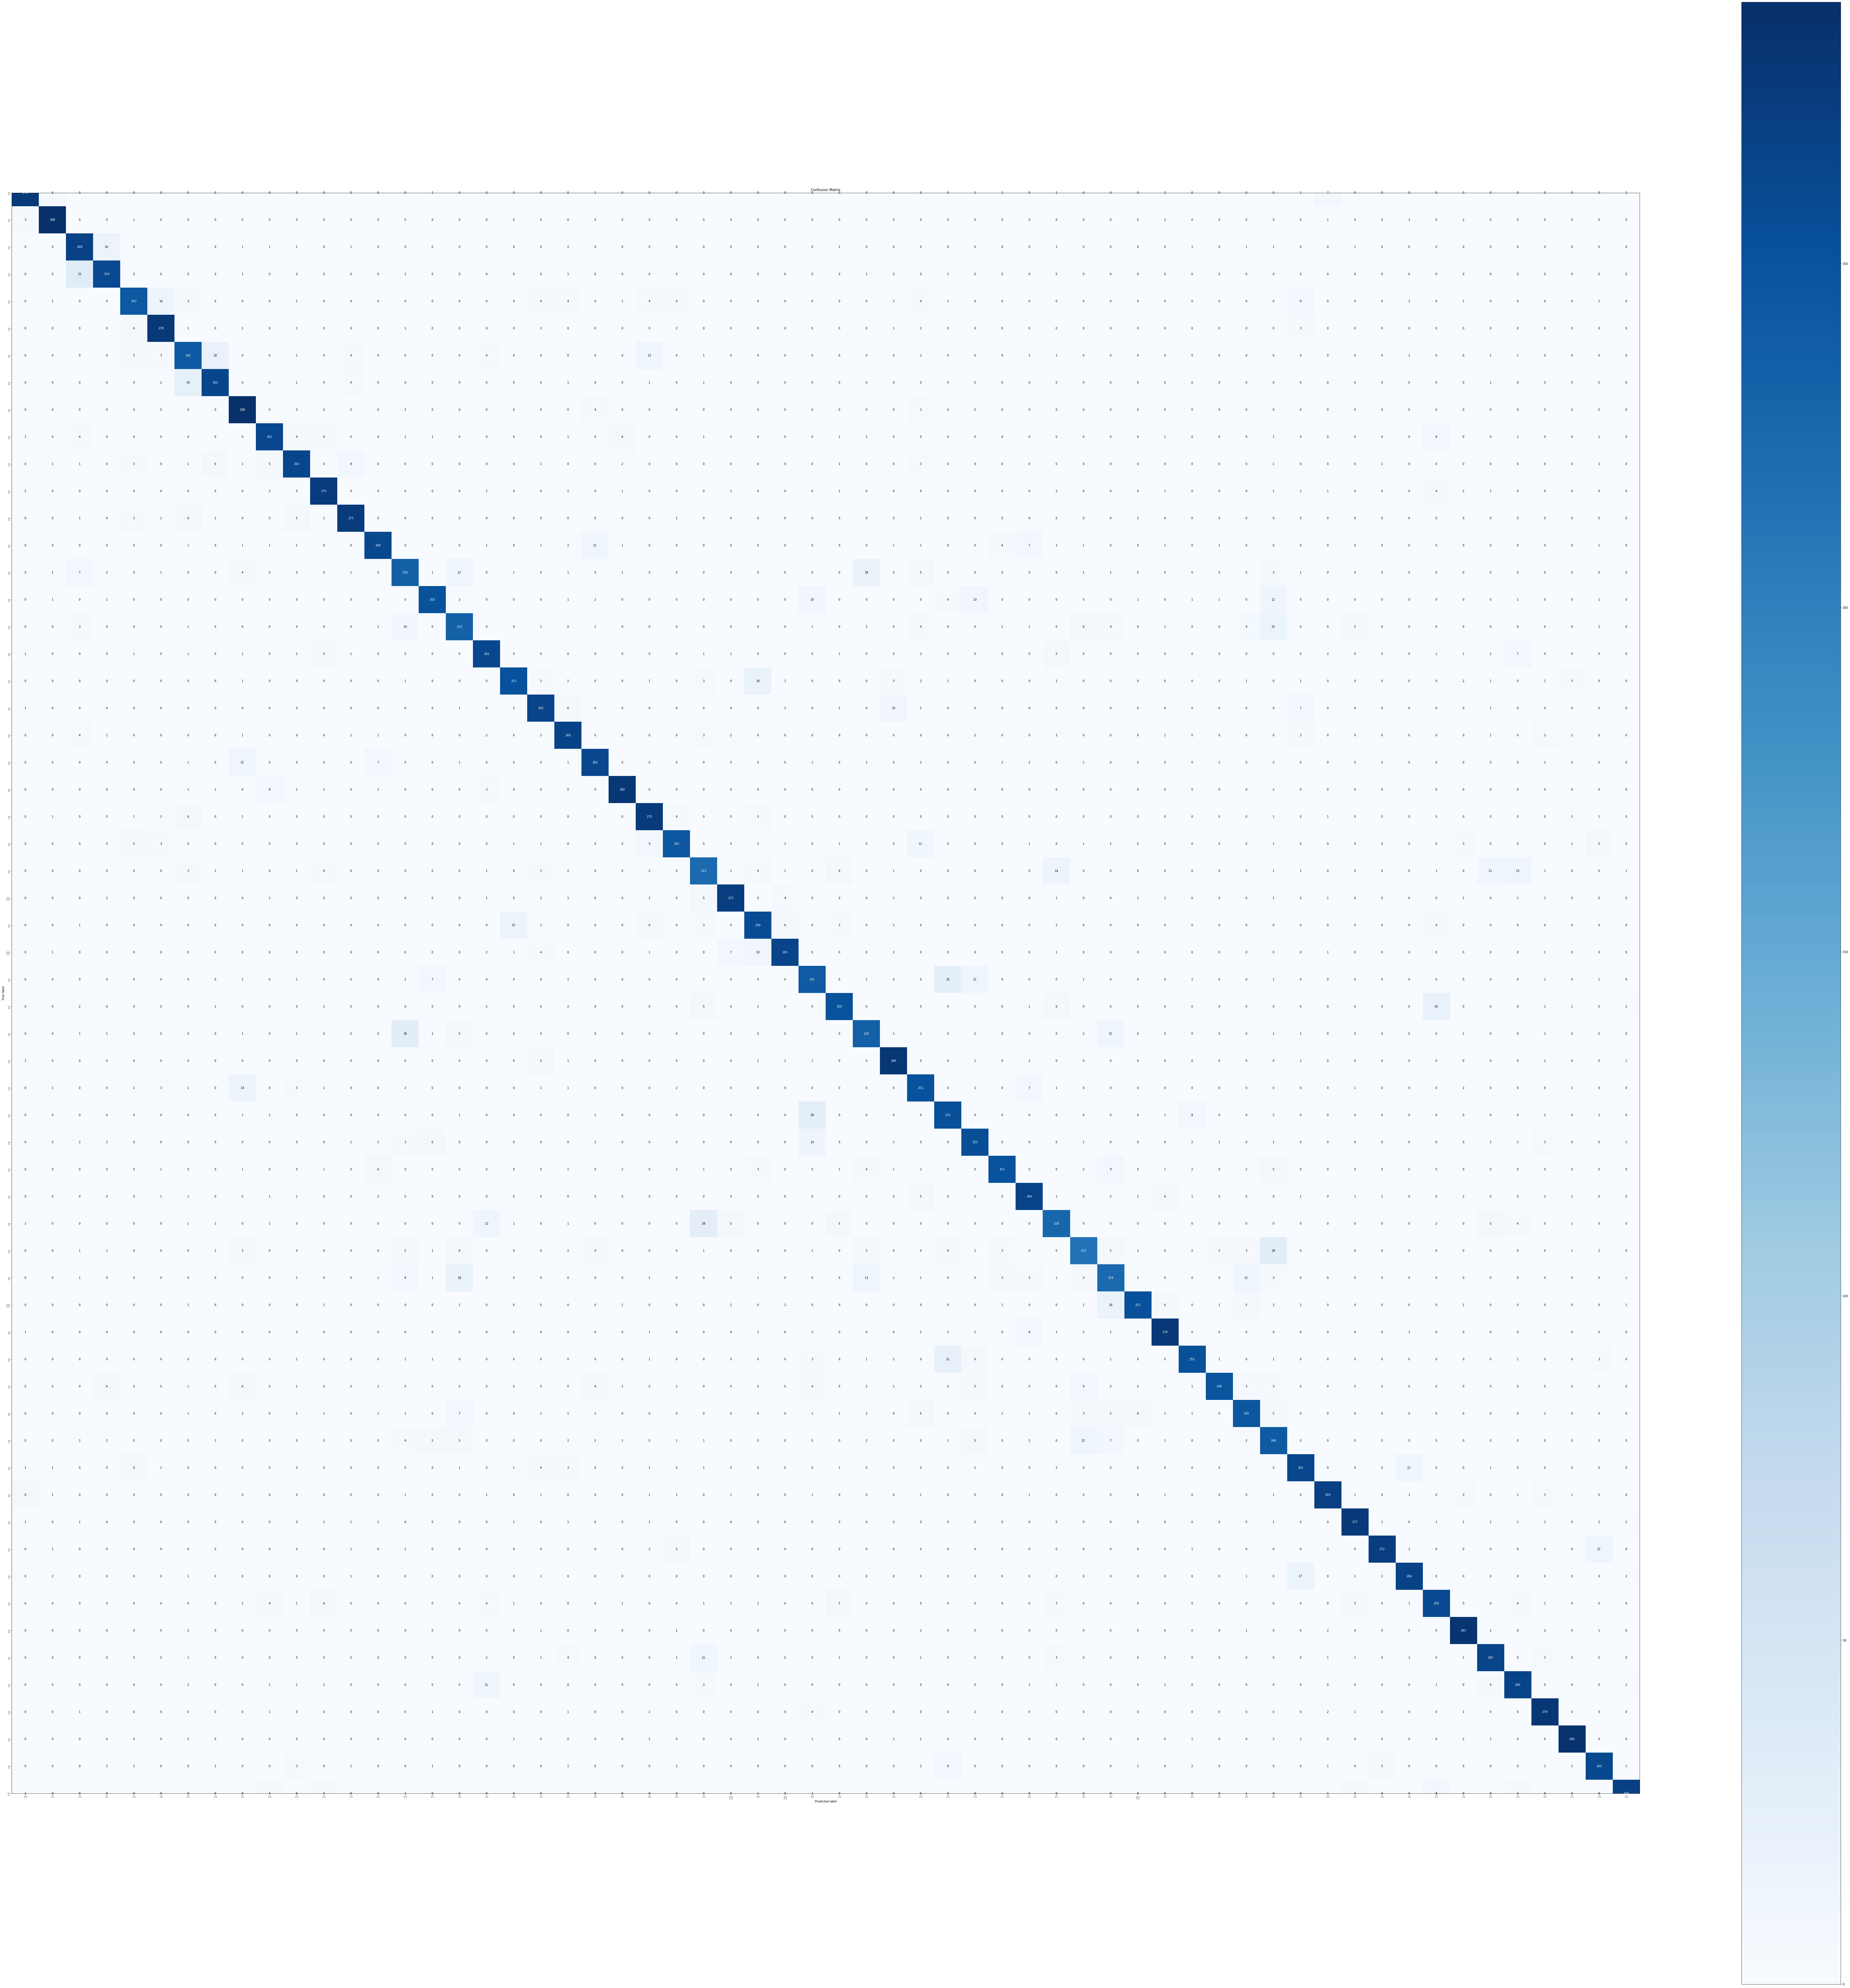

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(125,125))

In [31]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           ং       0.93      0.93      0.93       298
           ঃ       0.94      0.97      0.95       298
           অ       0.80      0.90      0.85       297
           আ       0.88      0.87      0.88       297
           ই       0.88      0.82      0.85       298
           ঈ       0.89      0.93      0.91       298
           উ       0.79      0.81      0.80       298
           ঊ       0.88      0.88      0.88       298
           ঋ       0.84      0.97      0.90       297
           এ       0.89      0.87      0.88       299
           ঐ       0.88      0.88      0.88       299
           ও       0.89      0.92      0.90       298
           ঔ       0.92      0.92      0.92       298
           ক       0.91      0.87      0.89       299
           খ       0.76      0.79      0.78       296
           গ       0.90      0.84      0.87       298
           ঘ       0.80      0.78      0.79       297
           ঙ       0.85    

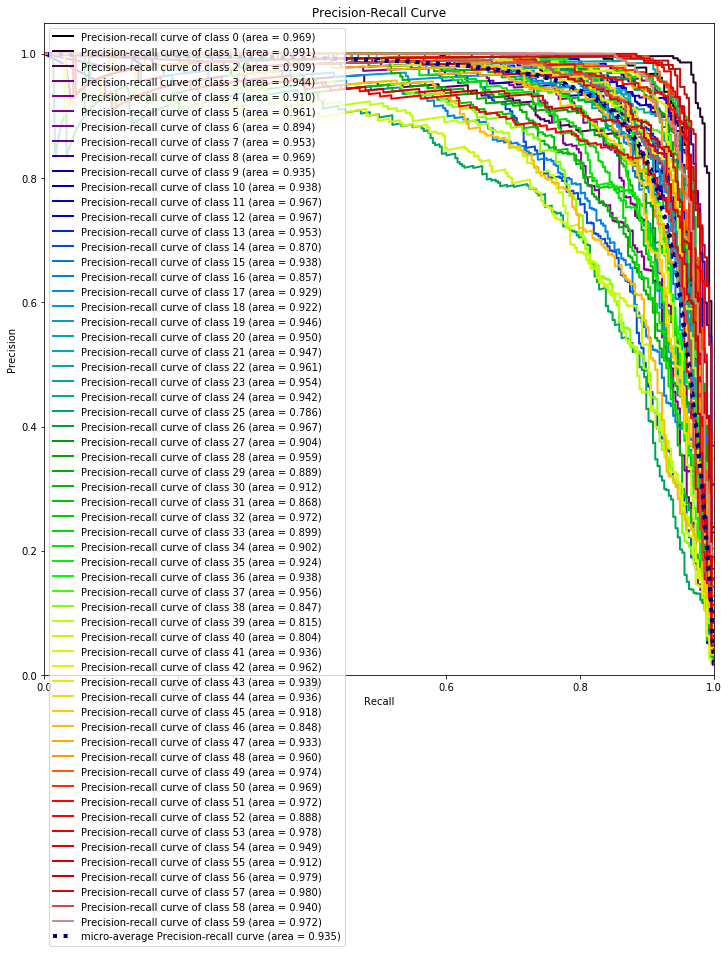

In [32]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

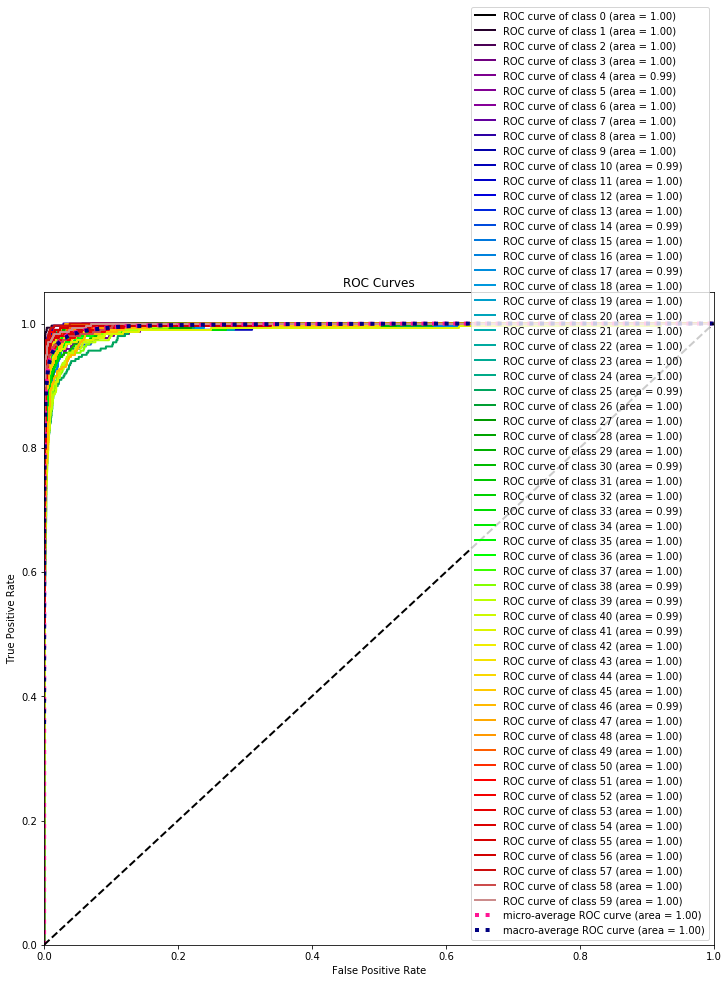

In [33]:
skplt.metrics.plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))